In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

In [2]:
# additional dependencies I will use to visualize the data during EDA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [3]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Data/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
application_df.shape

(34299, 12)

In [5]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN'])

In [6]:
application_df.shape

(34299, 11)

In [7]:
application_df.columns

Index(['NAME', 'APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [8]:
application_df.shape

(34299, 11)

In [9]:
# Determine the number of unique values in each column.
# for col in application_df:
#    print(application_df[col].unique())
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [10]:
# # examine value counts for STATUS
# application_df["STATUS"].value_counts()

# # drop STATUS as it has very little variability / information

In [11]:
# # Drop the additional non-beneficial columns, 'STATUS', AND 'SPECIAL CONSIDERATIONS'
# application_df = application_df.drop(columns=['STATUS', 'SPECIAL_CONSIDERATIONS'])
# application_df.info()

In [12]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df["APPLICATION_TYPE"].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [13]:
application_counts.describe()

count       17.000000
mean      2017.588235
std       6468.877251
min          1.000000
25%          3.000000
50%        156.000000
75%       1065.000000
max      27037.000000
Name: APPLICATION_TYPE, dtype: float64

<AxesSubplot:ylabel='Density'>

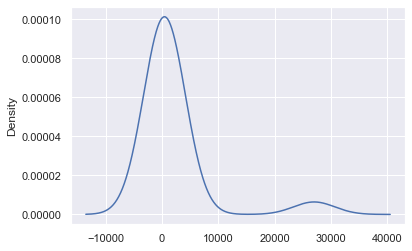

In [14]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [15]:
# Determine which values to replace if counts are less than 500?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [16]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df["CLASSIFICATION"].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

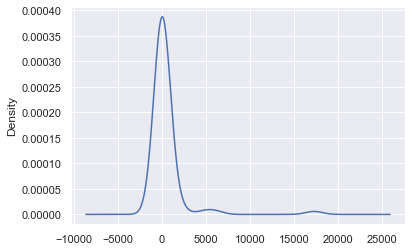

In [17]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [18]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [19]:
# Look at NAME value counts for binning
name_counts = application_df["NAME"].value_counts()
name_counts

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

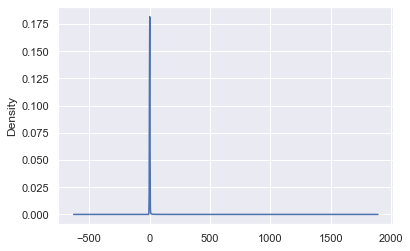

In [20]:
# Visualize the value counts of NAME
name_counts.plot.density()

In [21]:
# how many name_counts are there with only 1?
name_counts[name_counts] <= 1

SOUTHWEST DEKALB EXTRA POINT CLUB                               True
WEBSTER GROVES SCHOOL DISTRICT PARENT-TEACHERS ORGANIZATION    False
EARLY CHILDHOOD MUSIC ASSOCIATION                              False
THE ARK OF TEXAS                                               False
AMERICAN ORFF-SCHULWERK ASSOCIATION                            False
                                                               ...  
TOPS CLUB INC                                                  False
TOPS CLUB INC                                                  False
TOPS CLUB INC                                                  False
TOPS CLUB INC                                                  False
TOPS CLUB INC                                                  False
Name: NAME, Length: 19568, dtype: bool

In [22]:
# how many name_counts are there with less than 5?
name_counts[name_counts] <= 5

SOUTHWEST DEKALB EXTRA POINT CLUB                               True
WEBSTER GROVES SCHOOL DISTRICT PARENT-TEACHERS ORGANIZATION     True
EARLY CHILDHOOD MUSIC ASSOCIATION                               True
THE ARK OF TEXAS                                                True
AMERICAN ORFF-SCHULWERK ASSOCIATION                             True
                                                               ...  
TOPS CLUB INC                                                  False
TOPS CLUB INC                                                  False
TOPS CLUB INC                                                  False
TOPS CLUB INC                                                  False
TOPS CLUB INC                                                  False
Name: NAME, Length: 19568, dtype: bool

In [23]:
# how many name_counts are there with less than 100 and greater than 5?
name_counts[((name_counts <= 100) & (name_counts > 5))]

AIR FORCE ASSOCIATION                                      99
WORKERS UNITED                                             97
GAMMA THETA UPSILON                                        92
INTERNATIONAL ASSOCIATION OF FIRE FIGHTERS                 91
SOCIETY OF SAINT VINCENT DE PAUL COUNCIL OF LOS ANGELES    87
                                                           ..
OLD OAK CLIFF CONSERVATION LEAGUE INC                       6
AMERICAN NEPHROLOGY NURSES ASSOCIATION                      6
HUMBLE ISD EDUCATIONAL SUPPORT GROUPS INC                   6
PROFESSIONAL LOADMASTER ASSOCIATION                         6
CBMC INC                                                    6
Name: NAME, Length: 324, dtype: int64

In [24]:
# how many name_counts are there with greater than 100
len(name_counts[name_counts > 100])

30

In [25]:
# Use a bucket technique to put those with more than 5 but less than 100 in a bucket
# Use the bucket technique to put those with 5 or less in a small bucket
# Determine which values to replace if couts are less than or equal to 5
replace_application = list(name_counts[name_counts <= 1].index)

# Replace in dataframe
for app in replace_application:
    application_df.NAME = application_df.NAME.replace(app,"No_repeat")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

No_repeat                                                             18776
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
                                                                      ...  
WASHINGTON EXPLORER SEARCH AND RESCUE                                     2
INTERNATIONAL ALLIANCE THEATRICAL STAGE EMPLOYEES & MOVING PICTURE        2
BIRTH NETWORK                                                             2
NATIONAL ASSOCIATON OF CORPORATE DIRECTORS                                2
NATIONAL SOCIETY COLONIAL DAMES XVII CENTURY                              2
Name: NAME, Length: 793, dtype: int64

In [26]:
# Use a bucket technique to put those with more than 5 but less than 100 in a bucket
# Use the bucket technique to put those with 5 or less in a small bucket
# Determine which values to replace if couts are less than or equal to 5
replace_application = list(name_counts[name_counts <= 5].index)

# Replace in dataframe
for app in replace_application:
    application_df.NAME = application_df.NAME.replace(app,"Infrequent")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

No_repeat                                       18776
Infrequent                                       1267
PARENT BOOSTER USA INC                           1260
TOPS CLUB INC                                     765
UNITED STATES BOWLING CONGRESS INC                700
                                                ...  
HABITAT FOR HUMANITY INTERNATIONAL                  6
DAMAGE PREVENTION COUNCIL OF TEXAS                  6
FLEET RESERVE ASSOCIATION                           6
HUGH OBRIAN YOUTH LEADERSHIP                        6
INTERNATIONAL CONGRESS OF CHURCHES MINISTERS        6
Name: NAME, Length: 356, dtype: int64

In [27]:
# Use a bucket technique to put those with more than 5 but less than 100 in a bucket
# Use the bucket technique to put those with 5 or less in a small bucket
# Determine which values to replace if couts are less than or equal to 5
replace_application = list(name_counts[name_counts < 100].index)

# Replace in dataframe
for app in replace_application:
    application_df.NAME = application_df.NAME.replace(app,"Frequent")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

No_repeat                                                             18776
Frequent                                                               5944
Infrequent                                                             1267
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGU

In [28]:
# Use a bucket technique to put those with more than 5 but less than 100 in a bucket
# Use the bucket technique to put those with 5 or less in a small bucket
# Determine which values to replace if couts are less than or equal to 5
replace_application = list(name_counts[name_counts > 100].index)

# Replace in dataframe
for app in replace_application:
    application_df.NAME = application_df.NAME.replace(app,"Habitual")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

No_repeat     18776
Habitual       8312
Frequent       5944
Infrequent     1267
Name: NAME, dtype: int64

In [29]:
application_df.dtypes[application_df.dtypes == "object"]

NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
dtype: object

In [30]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [31]:
application_df[application_cat]

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS
0,Frequent,T10,Independent,C1000,ProductDev,Association,0,N
1,No_repeat,T3,Independent,C2000,Preservation,Co-operative,1-9999,N
2,No_repeat,T5,CompanySponsored,C3000,ProductDev,Association,0,N
3,No_repeat,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N
4,No_repeat,T3,Independent,C1000,Heathcare,Trust,100000-499999,N
...,...,...,...,...,...,...,...,...
34294,No_repeat,T4,Independent,C1000,ProductDev,Association,0,N
34295,Habitual,T4,CompanySponsored,C3000,ProductDev,Association,0,N
34296,Infrequent,T3,CompanySponsored,C2000,Preservation,Association,0,N
34297,No_repeat,T5,Independent,C3000,ProductDev,Association,0,N


In [32]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))


# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\Kaalrok\anaconda3_1\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,NAME_Frequent,NAME_Habitual,NAME_Infrequent,NAME_No_repeat,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
#  Merge application_cat with application_df
application_df = application_df.merge(encode_df, left_index = True, right_index = True)
application_df = application_df.drop(columns=application_cat)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_Frequent,NAME_Habitual,NAME_Infrequent,NAME_No_repeat,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
application_df.shape

(34299, 48)

In [35]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATUS                        34299 non-null  int64  
 1   ASK_AMT                       34299 non-null  int64  
 2   IS_SUCCESSFUL                 34299 non-null  int64  
 3   NAME_Frequent                 34299 non-null  float64
 4   NAME_Habitual                 34299 non-null  float64
 5   NAME_Infrequent               34299 non-null  float64
 6   NAME_No_repeat                34299 non-null  float64
 7   APPLICATION_TYPE_Other        34299 non-null  float64
 8   APPLICATION_TYPE_T10          34299 non-null  float64
 9   APPLICATION_TYPE_T19          34299 non-null  float64
 10  APPLICATION_TYPE_T3           34299 non-null  float64
 11  APPLICATION_TYPE_T4           34299 non-null  float64
 12  APPLICATION_TYPE_T5           34299 non-null  float64
 13  A

### Split the preprocessed data into features and target arrays

### Split the preprocessed data inot training and testing dataset

In [36]:
# split our preprocessed data inot our features and target arrays
# X is our feature matrix
X = application_df.drop(columns=['IS_SUCCESSFUL']).values

y = application_df["IS_SUCCESSFUL"].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

### Create a StandardScaler instance

### Fit the StandardScaler

In [37]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [38]:
# testing
X_train[ :0]

array([], shape=(0, 47), dtype=float64)

In [39]:
len(X_train[0])

47

In [40]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# see module 19.4.4 Deep Learning Model Design
number_input_features = len(X_train[0])
hidden_nodes_layer1 = number_input_features * 3
hidden_nodes_layer2 = number_input_features * 2
hidden_nodes_layer3 = number_input_features * 1
hidden_nodes_layer4 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 141)               6768      
                                                                 
 dense_1 (Dense)             (None, 94)                13348     
                                                                 
 dense_2 (Dense)             (None, 47)                4465      
                                                                 
 dense_3 (Dense)             (None, 20)                960       
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 25,562
Trainable params: 25,562
Non-trainable params: 0
_________________________________________________________________


### Implement Checkpoints

Create a callback that saves the model's weights every 5 epochs

In [41]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

### Compile the model

In [42]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
# Create a callback that saves the model's weights every epoch (set to 5)
# epoch = 5

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

### Train the model

In [44]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 4:40 - loss: 0.6652 - accuracy: 0.6562
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.6872 - accuracy: 0.5641  
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 34/804 [>.............................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5515
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 50/804 [>.............................] - ETA: 2s - loss: 0.6898 - accuracy: 0.5525
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5



Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
550/804 [===================>..........] - ETA: 0s - loss: 0.6928 - accuracy: 0.5227
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.6927 - accuracy: 0.5231
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 0.6925 - accuracy: 0.5243
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.


Epoch 2: saving model to checkpoints\weights.02.hdf5
276/804 [=========>....................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5276
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
296/804 [==========>...................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5273
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
316/804 [==========>...................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5285
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
336/804 [===========>..................] - ETA


Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.6889 - accuracy: 0.5533
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 0.6888 - accuracy: 0.5515
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5285
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.


Epoch 3: saving model to checkpoints\weights.03.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5204
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
562/804 [===================>..........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5209
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5214
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.6917 - accuracy: 0.5207
Epoch 3: saving

253/804 [========>.....................] - ETA: 1s - loss: 0.6924 - accuracy: 0.5238
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
273/804 [=========>....................] - ETA: 1s - loss: 0.6926 - accuracy: 0.5234
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
293/804 [=========>....................] - ETA: 1s - loss: 0.6924 - accuracy: 0.5251
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
313/804 [==========>...................] - ETA: 1s - loss: 0.6925 - accuracy: 0.5251
Epoch 4: saving


Epoch 4: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6922 - accuracy: 0.5280
Epoch 5/100
  1/804 [..............................] - ETA: 1s - loss: 0.6807 - accuracy: 0.6562
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.6860 - accuracy: 0.5724
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 0.6884 - accuracy: 0.5569
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5


Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5331
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5336
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5342
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.

255/804 [========>.....................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5349
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5328
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
295/804 [==========>...................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5335
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
315/804 [==========>...................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5338
Epoch 6: saving


Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6920 - accuracy: 0.5276
Epoch 7/100

Epoch 7: saving model to checkpoints\weights.07.hdf5
  1/804 [..............................] - ETA: 13s - loss: 0.7000 - accuracy: 0.4688
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.6884 - accuracy: 0.5527 
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
 33/804 [>.............................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5369
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hd

526/804 [==================>...........] - ETA: 0s - loss: 0.6919 - accuracy: 0.5285
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 0.6919 - accuracy: 0.5280
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
566/804 [====================>.........] - ETA: 0s - loss: 0.6919 - accuracy: 0.5284
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.6921 - accuracy: 0.5262
Epoch 7: saving

257/804 [========>.....................] - ETA: 1s - loss: 0.6927 - accuracy: 0.5186
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
277/804 [=========>....................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5243
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5256
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5232
Epoch 8: saving


Epoch 8: saving model to checkpoints\weights.08.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6916 - accuracy: 0.5309
Epoch 8: saving model to checkpoints\weights.08.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6916 - accuracy: 0.5308
Epoch 9/100
  1/804 [..............................] - ETA: 1s - loss: 0.6893 - accuracy: 0.5625
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.6933 - accuracy: 0.5087
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5387
Epoch 9: saving model 


Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
533/804 [==================>...........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5355
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5349
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
573/804 [====================>.........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.

255/804 [========>.....................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5270
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
274/804 [=========>....................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5292
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
294/804 [=========>....................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5318
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5314
Epo

779/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 10: saving model to checkpoints\weights.10.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6914 - accuracy: 0.5313
Epoch 11/100
  1/804 [..............................] - ETA: 1s - loss: 0.6949 - accuracy: 0.5000
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.6926 - accuracy: 0.5234
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: s

500/804 [=================>............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5296
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
520/804 [==================>...........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5299
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5314
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5324
Epo


Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
236/804 [=======>......................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5319
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
256/804 [========>.....................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5315
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
276/804 [=========>....................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5345
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkp

761/804 [===========================>..] - ETA: 0s - loss: 0.6917 - accuracy: 0.5310
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6916 - accuracy: 0.5313
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6917 - accuracy: 0.5308
Epoch 13/100
  1/804 [..............................] - ETA: 0s - loss: 0.6983 - accuracy: 0.4688
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\we


Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
502/804 [=================>............] - ETA: 0s - loss: 0.6917 - accuracy: 0.5281
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
522/804 [==================>...........] - ETA: 0s - loss: 0.6917 - accuracy: 0.5275
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 0.6917 - accuracy: 0.5281
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkp

218/804 [=======>......................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5254
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5249
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
258/804 [========>.....................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5237
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5263
Epo

760/804 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5317
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6916 - accuracy: 0.5318
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6915 - accuracy: 0.5321
Epoch 15/100
  1/804 [..............................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5312
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\we

484/804 [=================>............] - ETA: 0s - loss: 0.6920 - accuracy: 0.5286
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
504/804 [=================>............] - ETA: 0s - loss: 0.6920 - accuracy: 0.5281
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
524/804 [==================>...........] - ETA: 0s - loss: 0.6920 - accuracy: 0.5287
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
544/804 [===================>..........] - ETA: 0s - loss: 0.6919 - accuracy: 0.5290
Epo


Epoch 16: saving model to checkpoints\weights.16.hdf5
215/804 [=======>......................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5281
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
235/804 [=======>......................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5290
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
255/804 [========>.....................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5317
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
275/804 [=========>..............


Epoch 16: saving model to checkpoints\weights.16.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5325
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5317
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5323
Epoch 16: saving model to checkpoints\weights.16.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6916 - accuracy: 0.5321
Epoch 17/100

Epoch 17: saving model to checkpoints\weights.17.hdf5
  1/804 [..............................] 

471/804 [================>.............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5327
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
491/804 [=================>............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
511/804 [==================>...........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
531/804 [==================>...........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epo


Epoch 18: saving model to checkpoints\weights.18.hdf5
202/804 [======>.......................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5371
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
222/804 [=======>......................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5366
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
242/804 [========>.....................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5360
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
262/804 [========>...............

737/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5336
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5330
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5337
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5325
Epo

458/804 [================>.............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5312
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
478/804 [================>.............] - ETA: 0s - loss: 0.6917 - accuracy: 0.5305
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
498/804 [=================>............] - ETA: 0s - loss: 0.6916 - accuracy: 0.5310
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 0.6917 - accuracy: 0.5306
Epo

179/804 [=====>........................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5325
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
199/804 [======>.......................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5308
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
220/804 [=======>......................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5310
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
239/804 [=======>......................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5303
Epo

720/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5309
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5307
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5313
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5317
Epo

440/804 [===============>..............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5345
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
461/804 [================>.............] - ETA: 0s - loss: 0.6908 - accuracy: 0.5357
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
481/804 [================>.............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5351
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
501/804 [=================>............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5344
Epo


Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
176/804 [=====>........................] - ETA: 2s - loss: 0.6924 - accuracy: 0.5218
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5276
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
216/804 [=======>......................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5282
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkp


Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5321
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5322
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkp

437/804 [===============>..............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5345
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
457/804 [================>.............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5341
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
477/804 [================>.............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5337
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
497/804 [=================>............] - ETA: 0s - loss: 0.6912 - accuracy: 0.5333
Epo

158/804 [====>.........................] - ETA: 1s - loss: 0.6925 - accuracy: 0.5212
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
178/804 [=====>........................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5242
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
198/804 [======>.......................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5249
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
218/804 [=======>......................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5280
Epo

693/804 [========================>.....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5282
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5301
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5303
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5311
Epo

419/804 [==============>...............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5326
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
439/804 [===============>..............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5342
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
459/804 [================>.............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5346
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
479/804 [================>.............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5343
Epo

140/804 [====>.........................] - ETA: 1s - loss: 0.6923 - accuracy: 0.5259
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
163/804 [=====>........................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5280
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
185/804 [=====>........................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5299
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
207/804 [======>.................


Epoch 26: saving model to checkpoints\weights.26.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5344
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5342
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5334
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
745/804 [========================


Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5351
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5346
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5338
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkp


Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
137/804 [====>.........................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5315
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
157/804 [====>.........................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5311
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
177/804 [=====>........................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5309
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkp


Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5310
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5313
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5316
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkp


Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
408/804 [==============>...............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5331
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5335
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5328
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkp


Epoch 30: saving model to checkpoints\weights.30.hdf5
119/804 [===>..........................] - ETA: 1s - loss: 0.6891 - accuracy: 0.5475
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
139/804 [====>.........................] - ETA: 1s - loss: 0.6894 - accuracy: 0.5456
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
159/804 [====>.........................] - ETA: 1s - loss: 0.6895 - accuracy: 0.5450
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
179/804 [=====>..................

654/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5347
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5337
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5336
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5334
Epo


Epoch 31: saving model to checkpoints\weights.31.hdf5
385/804 [=============>................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5269
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5299
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5315
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
440/804 [===============>..............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5319
Epo


Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
116/804 [===>..........................] - ETA: 2s - loss: 0.6933 - accuracy: 0.5132
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 0.6928 - accuracy: 0.5195
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
156/804 [====>.........................] - ETA: 2s - loss: 0.6931 - accuracy: 0.5166
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkp

641/804 [======================>.......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5308
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.6916 - accuracy: 0.5303
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5310
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5314
Epo


Epoch 33: saving model to checkpoints\weights.33.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5307
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
392/804 [=============>................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5290
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 0.6920 - accuracy: 0.5289
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
432/804 [===============>........


Epoch 34: saving model to checkpoints\weights.34.hdf5
 98/804 [==>...........................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5312
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
118/804 [===>..........................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5262
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
138/804 [====>.........................] - ETA: 1s - loss: 0.6923 - accuracy: 0.5258
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
158/804 [====>...................


Epoch 34: saving model to checkpoints\weights.34.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5331
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5337
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5336
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
698/804 [========================

359/804 [============>.................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5313
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5307
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
394/804 [=============>................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5307
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5303
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epo

 83/804 [==>...........................] - ETA: 1s - loss: 0.6931 - accuracy: 0.5203
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
101/804 [==>...........................] - ETA: 1s - loss: 0.6923 - accuracy: 0.5266
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
120/804 [===>..........................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5268
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
140/804 [====>.........................] - ETA: 1s - loss: 0.6926 - accuracy: 0.5232
Epo

610/804 [=====================>........] - ETA: 0s - loss: 0.6917 - accuracy: 0.5294
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.6916 - accuracy: 0.5299
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.6917 - accuracy: 0.5295
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5302
Epo


Epoch 37: saving model to checkpoints\weights.37.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5372
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5373
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
381/804 [=============>................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5353
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
401/804 [=============>..........


Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
 77/804 [=>............................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5337
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
 97/804 [==>...........................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5341
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
117/804 [===>..........................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5312
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkp


Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5329
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5322
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5309
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkp


Epoch 39: saving model to checkpoints\weights.39.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5276
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
349/804 [============>.................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5270
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
368/804 [============>.................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5275
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
388/804 [=============>..........

 29/804 [>.............................] - ETA: 3s - loss: 0.6934 - accuracy: 0.5108
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 0.6929 - accuracy: 0.5185
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
 62/804 [=>............................] - ETA: 2s - loss: 0.6926 - accuracy: 0.5217
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
 79/804 [=>............................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5249
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epo

559/804 [===================>..........] - ETA: 0s - loss: 0.6917 - accuracy: 0.5291
Epoch 40: saving model to checkpoints\weights.40.hdf5
564/804 [====================>.........] - ETA: 0s - loss: 0.6917 - accuracy: 0.5289
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5296
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5297
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
619/


Epoch 41: saving model to checkpoints\weights.41.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5341
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
295/804 [==========>...................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5337
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
315/804 [==========>...................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5336
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
335/804 [===========>............


Epoch 42: saving model to checkpoints\weights.42.hdf5
  1/804 [..............................] - ETA: 12s - loss: 0.6995 - accuracy: 0.4688
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
 21/804 [..............................] - ETA: 2s - loss: 0.6896 - accuracy: 0.5446 
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
 41/804 [>.............................] - ETA: 2s - loss: 0.6896 - accuracy: 0.5442
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
 61/804 [=>....................

534/804 [==================>...........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5332
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
551/804 [===================>..........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5332
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5331
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5327
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epo


Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
262/804 [========>.....................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5328
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
282/804 [=========>....................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
302/804 [==========>...................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5318
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkp


Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 44/100
  1/804 [..............................] - ETA: 0s - loss: 0.6963 - accuracy: 0.5000
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.6840 - accuracy: 0.5747
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 0.6850 - accuracy: 0.5674
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\we


Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
533/804 [==================>...........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5364
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5359
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
573/804 [====================>.........] - ETA: 0s - loss: 0.6908 - accuracy: 0.5360
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkp

244/804 [========>.....................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5266
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
264/804 [========>.....................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5250
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5253
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
304/804 [==========>...................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5285
Epo

784/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5324
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 45: saving model to checkpoints\weights.45.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 46/100
  1/804 [..............................] - ETA: 0s - loss: 0.7005 - accuracy: 0.4688
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.6952 - accuracy: 0.5037
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: s


Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5313
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
535/804 [==================>...........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5317
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5307
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkp


Epoch 47: saving model to checkpoints\weights.47.hdf5
236/804 [=======>......................] - ETA: 1s - loss: 0.6926 - accuracy: 0.5196
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
256/804 [========>.....................] - ETA: 1s - loss: 0.6925 - accuracy: 0.5212
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
276/804 [=========>....................] - ETA: 1s - loss: 0.6924 - accuracy: 0.5223
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
296/804 [==========>.............


Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 47: saving model to checkpoints\weights.47.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 48/100
  1/804 [..............................] - ETA: 0s - loss: 0.7009 - accuracy: 0.4688
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
 17/804 [..............................] 


Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
502/804 [=================>............] - ETA: 0s - loss: 0.6913 - accuracy: 0.5328
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
522/804 [==================>...........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5332
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5333
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkp

218/804 [=======>......................] - ETA: 1s - loss: 0.6925 - accuracy: 0.5199
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 0.6924 - accuracy: 0.5211
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
258/804 [========>.....................] - ETA: 1s - loss: 0.6923 - accuracy: 0.5235
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5245
Epo


Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5315
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 49: saving model to checkpoints\weights.49.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6913 - accuracy: 0.5321


Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
479/804 [================>.............] - ETA: 0s - loss: 0.6910 - accuracy: 0.5343
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
499/804 [=================>............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5359
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
519/804 [==================>...........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5349
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkp


Epoch 51: saving model to checkpoints\weights.51.hdf5
200/804 [======>.......................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5259
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
220/804 [=======>......................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5251
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
240/804 [=======>......................] - ETA: 1s - loss: 0.6923 - accuracy: 0.5240
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
260/804 [========>...............

734/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5324
Epo


Epoch 52: saving model to checkpoints\weights.52.hdf5
456/804 [================>.............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5299
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
476/804 [================>.............] - ETA: 0s - loss: 0.6916 - accuracy: 0.5300
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
496/804 [=================>............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5308
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
516/804 [==================>.....


Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
187/804 [=====>........................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5353
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
207/804 [======>.......................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5362
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
227/804 [=======>......................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5370
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkp


Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5321
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5320
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkp

438/804 [===============>..............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5300
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
458/804 [================>.............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5300
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
478/804 [================>.............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5305
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
498/804 [=================>............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5312
Epo

159/804 [====>.........................] - ETA: 1s - loss: 0.6897 - accuracy: 0.5434
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
179/804 [=====>........................] - ETA: 1s - loss: 0.6896 - accuracy: 0.5435
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
199/804 [======>.......................] - ETA: 1s - loss: 0.6898 - accuracy: 0.5424
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
219/804 [=======>......................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5398
Epo

699/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5311
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5309
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5315
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epo

420/804 [==============>...............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5292
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
439/804 [===============>..............] - ETA: 0s - loss: 0.6917 - accuracy: 0.5282
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
455/804 [===============>..............] - ETA: 0s - loss: 0.6917 - accuracy: 0.5295
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
474/804 [================>.............] - ETA: 0s - loss: 0.6916 - accuracy: 0.5296
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epo


Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
141/804 [====>.........................] - ETA: 1s - loss: 0.6899 - accuracy: 0.5417
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
162/804 [=====>........................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5394
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
181/804 [=====>........................] - ETA: 1s - loss: 0.6901 - accuracy: 0.5401
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkp


Epoch 57: saving model to checkpoints\weights.57.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5344
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
736/804 [========================

397/804 [=============>................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5359
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5360
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5346
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
457/804 [================>.............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5359
Epo


Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
133/804 [===>..........................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5392
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
153/804 [====>.........................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5372
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
173/804 [=====>........................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5374
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkp


Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkp


Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
397/804 [=============>................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5327
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkp


Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5333
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
140/804 [====>.........................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5310
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
160/804 [====>.........................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5328
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkp


Epoch 61: saving model to checkpoints\weights.61.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5332
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
705/804 [========================


Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
381/804 [=============>................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5359
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
401/804 [=============>................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5355
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5361
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkp


Epoch 63: saving model to checkpoints\weights.63.hdf5
 97/804 [==>...........................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5296
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
117/804 [===>..........................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5243
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
137/804 [====>.........................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5240
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
157/804 [====>...................

629/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5344
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5342
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5345
Epo


Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5279
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
378/804 [=============>................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5291
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
398/804 [=============>................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5298
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkp


Epoch 65: saving model to checkpoints\weights.65.hdf5
 79/804 [=>............................] - ETA: 2s - loss: 0.6924 - accuracy: 0.5218
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
 99/804 [==>...........................] - ETA: 1s - loss: 0.6923 - accuracy: 0.5230
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
119/804 [===>..........................] - ETA: 1s - loss: 0.6923 - accuracy: 0.5228
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
139/804 [====>...................


Epoch 65: saving model to checkpoints\weights.65.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5313
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5315
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5317
Epo

335/804 [===========>..................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5339
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
350/804 [============>.................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5340
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5326
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5342
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epo

 61/804 [=>............................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5287
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
 81/804 [==>...........................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5282
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
101/804 [==>...........................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5325
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
121/804 [===>..........................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5287
Epo

601/804 [=====================>........] - ETA: 0s - loss: 0.6909 - accuracy: 0.5352
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5345
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5336
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epo


Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
337/804 [===========>..................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5311
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5340
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
392/804 [=============>..........


Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.6894 - accuracy: 0.5447
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
 78/804 [=>............................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5365
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
 97/804 [==>...........................] - ETA: 1s - loss: 0.6902 - accuracy: 0.5396
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
117/804 [===>....................


Epoch 69: saving model to checkpoints\weights.69.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5338
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
653/804 [=======================>


Epoch 70: saving model to checkpoints\weights.70.hdf5
319/804 [==========>...................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5330
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5324
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5338
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5356
Epo


Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
 40/804 [>.............................] - ETA: 2s - loss: 0.6886 - accuracy: 0.5555
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5396
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5329
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
 91/804 [==>.....................


Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
575/804 [====================>.........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5309
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5292
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5290
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkp


Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5299
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
321/804 [==========>...................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5304
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5320
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkp

 17/804 [..............................] - ETA: 2s - loss: 0.6871 - accuracy: 0.5625
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5355
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.6899 - accuracy: 0.5417
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
 77/804 [=>............................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5312
Epo


Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
562/804 [===================>..........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5304
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5298
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
602/804 [=====================>........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5293
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkp

278/804 [=========>....................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5278
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5268
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
318/804 [==========>...................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5268
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 0.6921 - accuracy: 0.5260
Epo

  1/804 [..............................] - ETA: 0s - loss: 0.6868 - accuracy: 0.5625
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.6947 - accuracy: 0.5115
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 0.6928 - accuracy: 0.5230
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
 56/804 [=>............................] - ETA: 2s - loss: 0.6928 - accuracy: 0.5223
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epo


Epoch 75: saving model to checkpoints\weights.75.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5346
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5338
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5335
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
599/804 [=====================>..

260/804 [========>.....................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5274
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
280/804 [=========>....................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5262
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 0.6919 - accuracy: 0.5268
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5259
Epo

804/804 [==============================] - 2s 3ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 77/100

Epoch 77: saving model to checkpoints\weights.77.hdf5
  1/804 [..............................] - ETA: 9s - loss: 0.6981 - accuracy: 0.4688
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
 21/804 [..............................] - ETA: 2s - loss: 0.6898 - accuracy: 0.5432
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
 41/804 [>.............................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5320
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\we

521/804 [==================>...........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5323
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5325
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
561/804 [===================>..........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epo


Epoch 78: saving model to checkpoints\weights.78.hdf5
247/804 [========>.....................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5312
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
267/804 [========>.....................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
288/804 [=========>....................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5336
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
309/804 [==========>.............


Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5322
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 79/100
  1/804 [..............................] - ETA: 1s - loss: 0.6829 - accuracy: 0.5938
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.6848 - accuracy: 0.5764
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\we


Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
513/804 [==================>...........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
533/804 [==================>...........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5311
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5298
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkp


Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
234/804 [=======>......................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5304
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
254/804 [========>.....................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5298
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
274/804 [=========>....................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5287
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkp


Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 81/100
  1/804 [..............................] - ETA: 1s - loss: 0.7030 - accuracy: 0.4375
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\we


Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
501/804 [=================>............] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
521/804 [==================>...........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5334
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
559/804 [===================>....


Epoch 82: saving model to checkpoints\weights.82.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 0.6927 - accuracy: 0.5173
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
231/804 [=======>......................] - ETA: 1s - loss: 0.6926 - accuracy: 0.5189
Epoch 82: saving model to checkpoints\weights.82.hdf5
239/804 [=======>......................] - ETA: 1s - loss: 0.6926 - accuracy: 0.5194
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
256/804 [========>.....................] - ETA: 1s - loss: 0.6925 - accuracy: 0.5203
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
276/


Epoch 82: saving model to checkpoints\weights.82.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5333
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 82: saving model to checkpoints\weights.82.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 83/100
  1/804 [..............................] - ETA: 0s - loss: 0.6841 - accuracy: 0.5938
Epoch 83: s


Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
487/804 [=================>............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5293
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
507/804 [=================>............] - ETA: 0s - loss: 0.6914 - accuracy: 0.5303
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
527/804 [==================>...........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5292
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkp

198/804 [======>.......................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5283
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
215/804 [=======>......................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5295
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
233/804 [=======>......................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5264
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
253/804 [========>.....................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5277
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epo


Epoch 84: saving model to checkpoints\weights.84.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5316
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
798/804 [========================

459/804 [================>.............] - ETA: 0s - loss: 0.6916 - accuracy: 0.5289
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
479/804 [================>.............] - ETA: 0s - loss: 0.6916 - accuracy: 0.5292
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
499/804 [=================>............] - ETA: 0s - loss: 0.6916 - accuracy: 0.5293
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
519/804 [==================>...........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5302
Epo

180/804 [=====>........................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5372
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
200/804 [======>.......................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5386
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
220/804 [=======>......................] - ETA: 1s - loss: 0.6905 - accuracy: 0.5378
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
240/804 [=======>......................] - ETA: 1s - loss: 0.6907 - accuracy: 0.5363
Epo

715/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5314
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epo

436/804 [===============>..............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5350
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
456/804 [================>.............] - ETA: 0s - loss: 0.6908 - accuracy: 0.5346
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
476/804 [================>.............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
496/804 [=================>............] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epo


Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
172/804 [=====>........................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5293
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
192/804 [======>.......................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5286
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
212/804 [======>.......................] - ETA: 1s - loss: 0.6917 - accuracy: 0.5282
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkp


Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkp

418/804 [==============>...............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5315
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5314
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epo

139/804 [====>.........................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
159/804 [====>.........................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5340
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
179/804 [=====>........................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5323
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
199/804 [======>.......................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epo


Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5315
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkp

400/804 [=============>................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5306
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5280
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epo


Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
136/804 [====>.........................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5368
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
156/804 [====>.........................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5341
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
176/804 [=====>........................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5298
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkp


Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkp


Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
402/804 [==============>...............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5351
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5350
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
442/804 [===============>..............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5354
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkp


Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
118/804 [===>..........................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5289
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
138/804 [====>.........................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5312
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
151/804 [====>.........................] - ETA: 1s - loss: 0.6903 - accuracy: 0.5381
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5383
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epo


Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5313
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkp


Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
334/804 [===========>..................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5288
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5303
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5307
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkp


Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5312
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
 80/804 [=>............................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5391
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
100/804 [==>...........................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5306
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkp


Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5329
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkp

321/804 [==========>...................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.6908 - accuracy: 0.5345
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
381/804 [=============>................] - ETA: 1s - loss: 0.6909 - accuracy: 0.5337
Epo


Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5258
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
 77/804 [=>............................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5300
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
 97/804 [==>...........................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5296
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkp


Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5317
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkp


Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
318/804 [==========>...................] - ETA: 1s - loss: 0.6912 - accuracy: 0.5325
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5327
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkp


Epoch 100: saving model to checkpoints\weights.100.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 0.6943 - accuracy: 0.5056
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.6935 - accuracy: 0.5122
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
 79/804 [=>............................] - ETA: 2s - loss: 0.6928 - accuracy: 0.5186
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
 99/804


Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
564/804 [====================>.........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5329
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5337
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 

<AxesSubplot:>

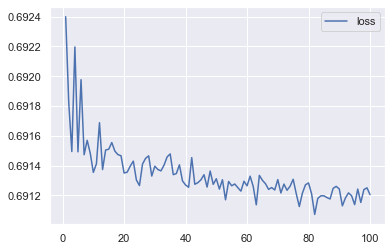

In [45]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

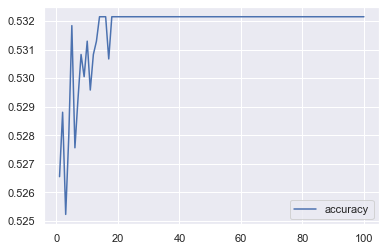

In [46]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [47]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6910 - accuracy: 0.5332 - 220ms/epoch - 819us/step
Loss: 0.6909581422805786, Accuracy: 0.5331778526306152


### Save the Model in HDF5 Format

In [48]:
# Export our model to HDF5 file
nn.save("./Trained_models/AlphabetSoupCharity_D3_D2.h5")

In [49]:
history_df.to_csv("./Data/D3_D2_history_df.csv")

### Import Model (Check)

In [50]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('./Trained_Models/AlphabetSoupCharity_D3_D2.h5')

### Evaluate the model (again as a check) using test data

In [51]:
# Evaluate the completed model using the test data
model_loss, model_accuracy = nn_imported.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6910 - accuracy: 0.5332 - 200ms/epoch - 748us/step
Loss: 0.6909581422805786, Accuracy: 0.5331778526306152


### Predict the classification of "new / unseen" data